In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Loading Data**

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 25.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 27.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 26.3MB/s]


In [3]:
df = pd.read_csv('train.csv')
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


## **Initial Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
df.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
df.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
df.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [5]:
df['TotalSpent'].value_counts()

TotalSpent
           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: count, Length: 4978, dtype: int64

In [6]:
df['TotalSpent'].replace(" ", np.nan, inplace=True)
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')
df['TotalSpent'].replace(np.nan, df['TotalSpent'].mean(), inplace=True)

In [7]:
df['IsSeniorCitizen'] = df['IsSeniorCitizen'].apply(lambda x: "Yes" if x else "No")

In [ ]:
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## **Variable Analysis**

In [8]:
num_columns = df.drop(columns='Churn').select_dtypes(exclude=object).columns.values
num_columns

array(['ClientPeriod', 'MonthlySpending', 'TotalSpent'], dtype=object)

In [9]:
cat_columns = df.select_dtypes(include=object).columns.values
cat_columns

array(['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild',
       'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup',
       'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
       'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless',
       'PaymentMethod'], dtype=object)

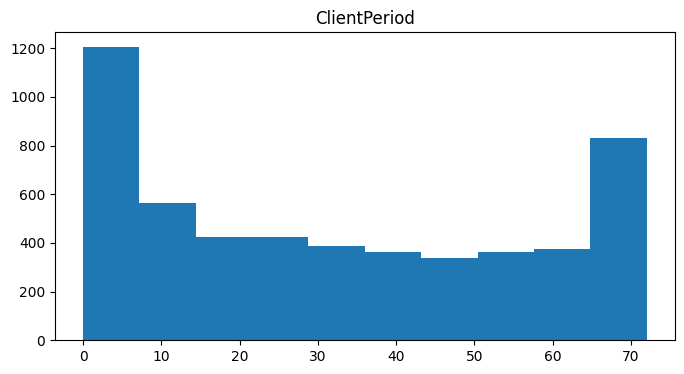

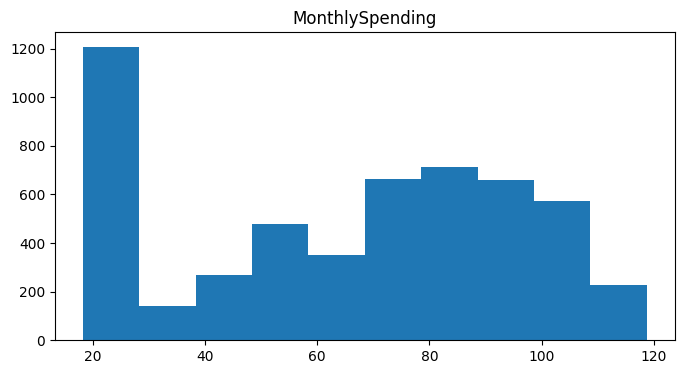

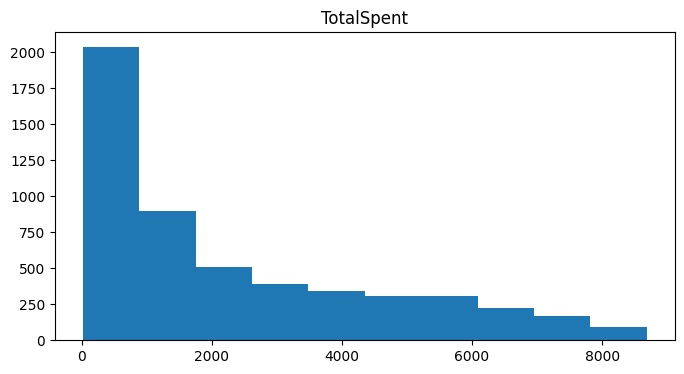

In [ ]:
for col in num_columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)

<ipython-input-17-bc1d29d51f08>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-17-bc1d29d51f08>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-17-bc1d29d51f08>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-17-bc1d29d51f08>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-17-bc1d29d51f08>:4: MatplotlibDeprecationWarning: Auto-removal of

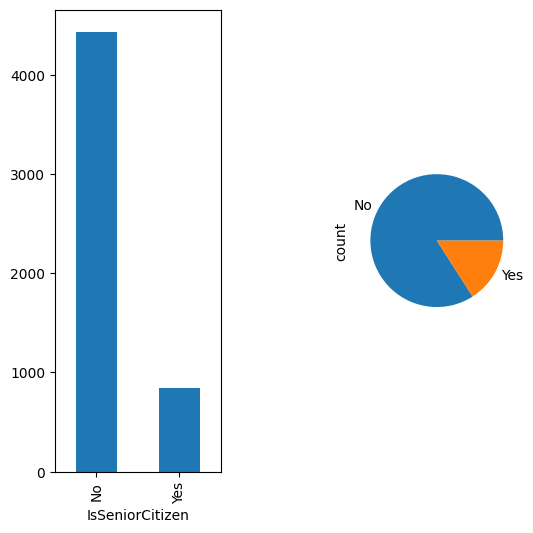

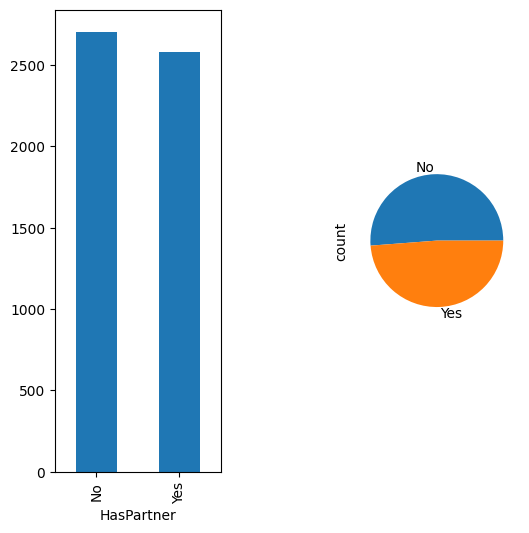

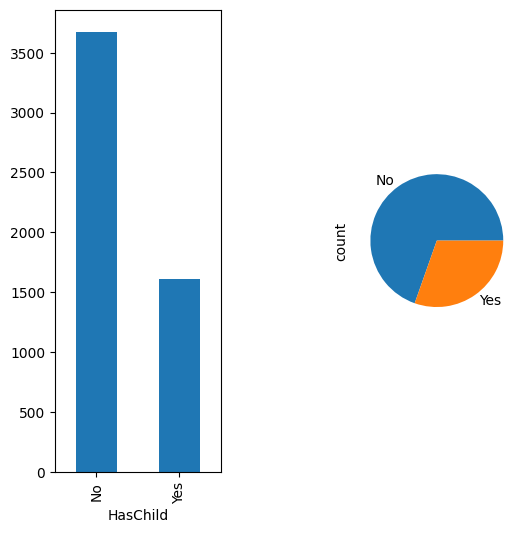

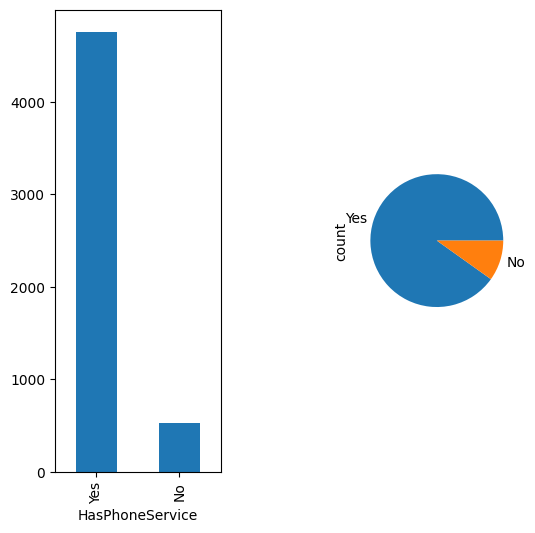

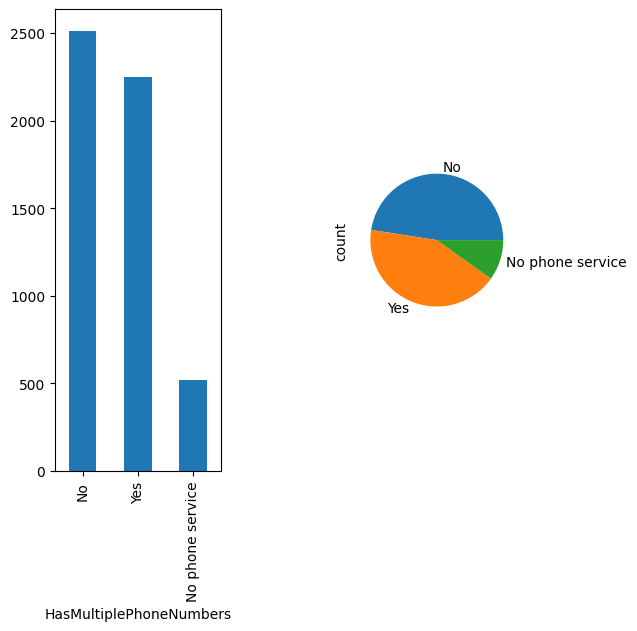

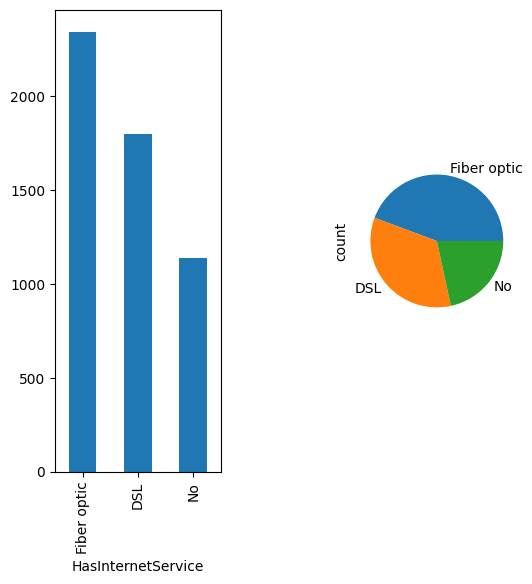

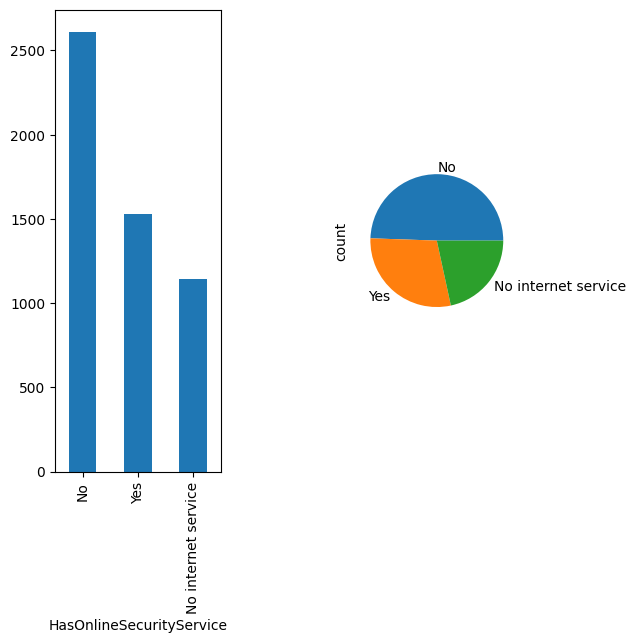

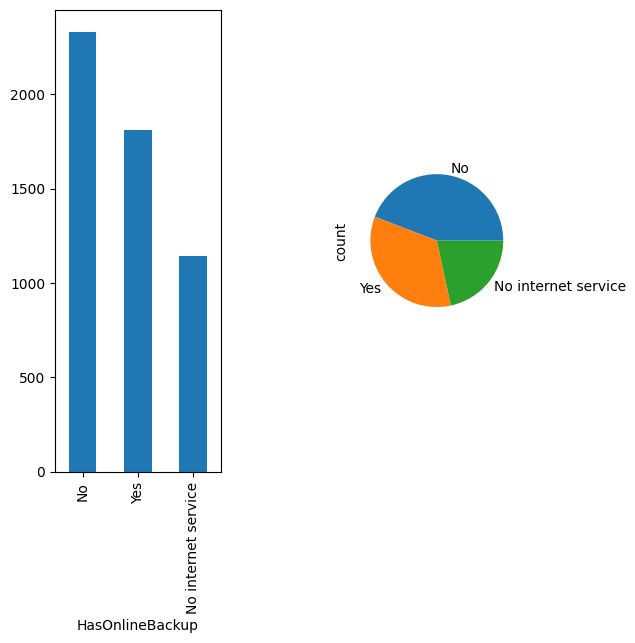

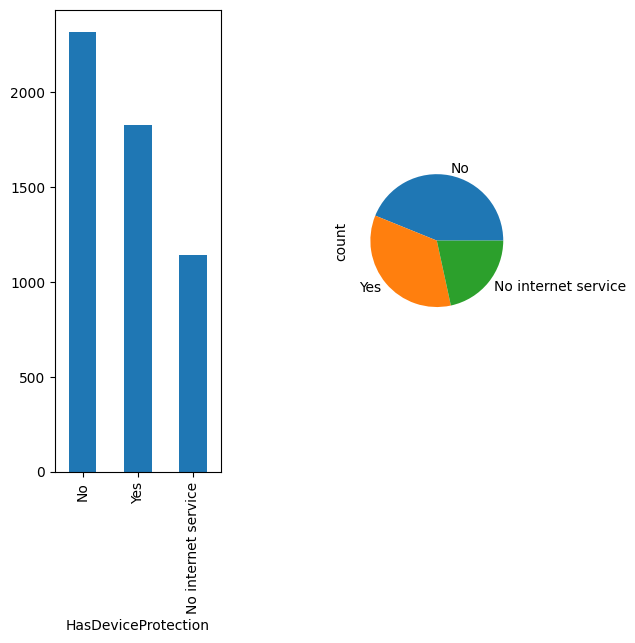

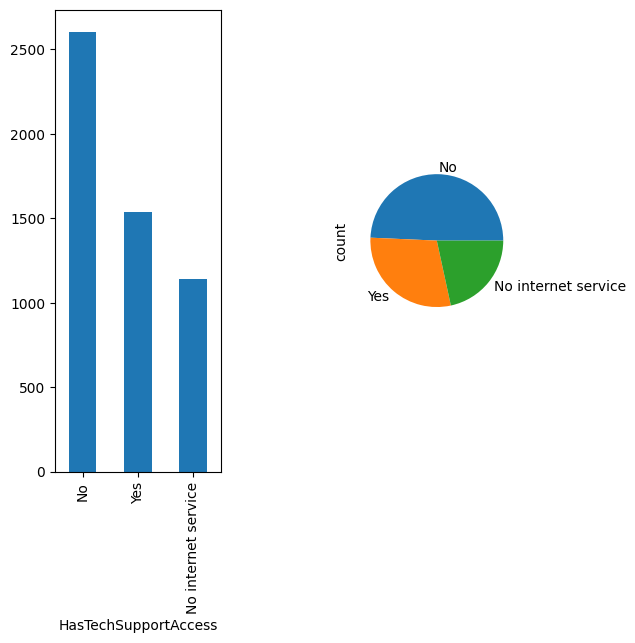

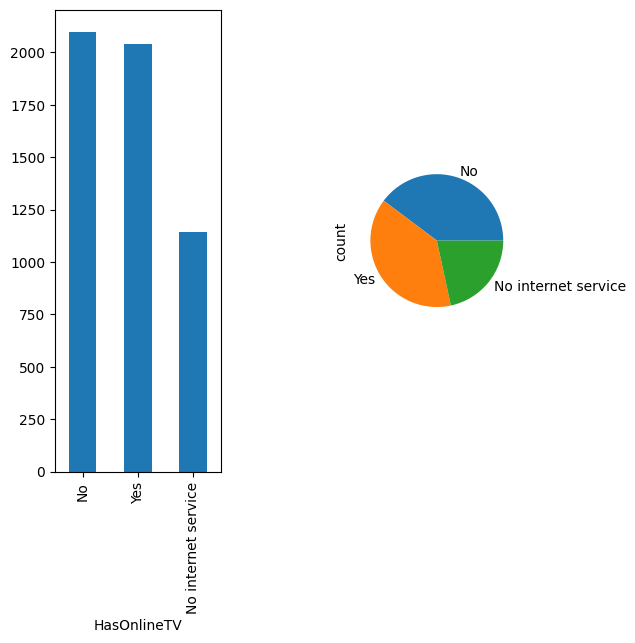

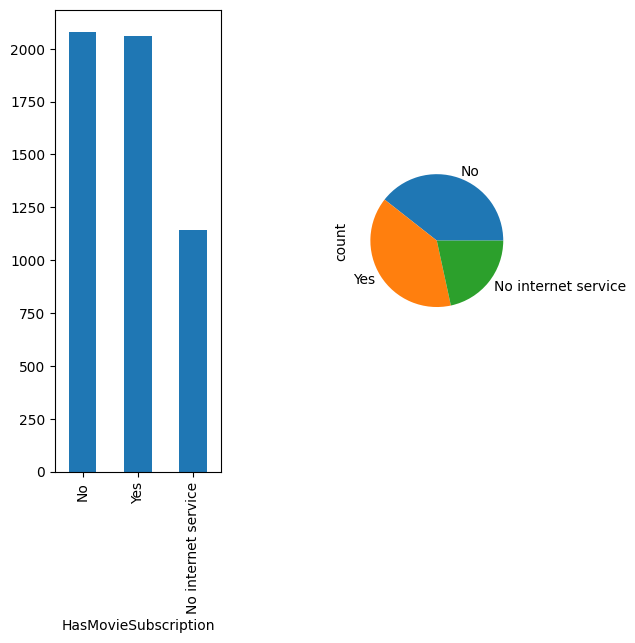

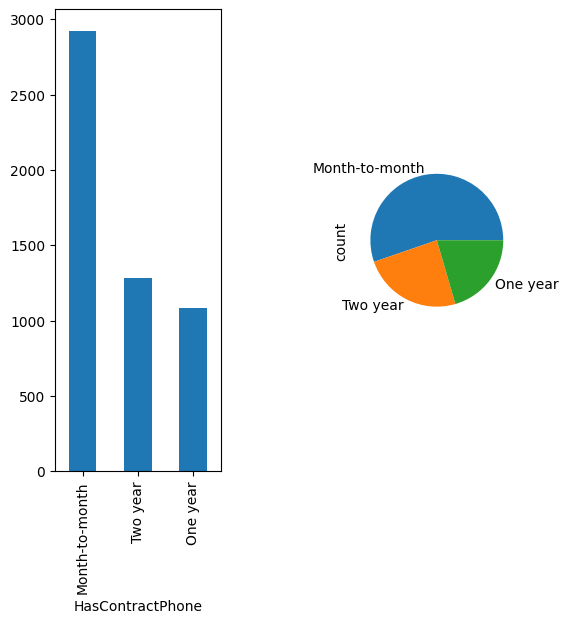

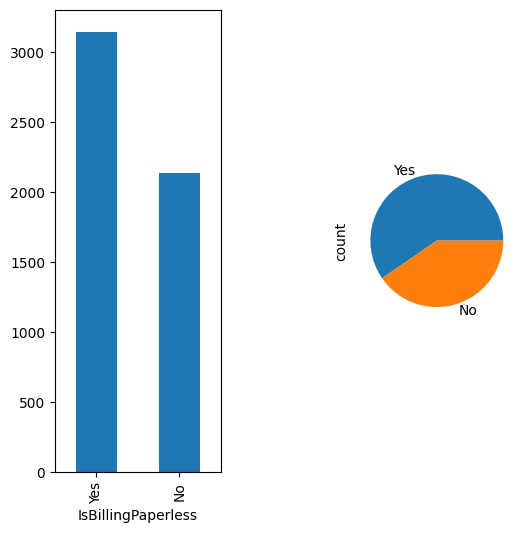

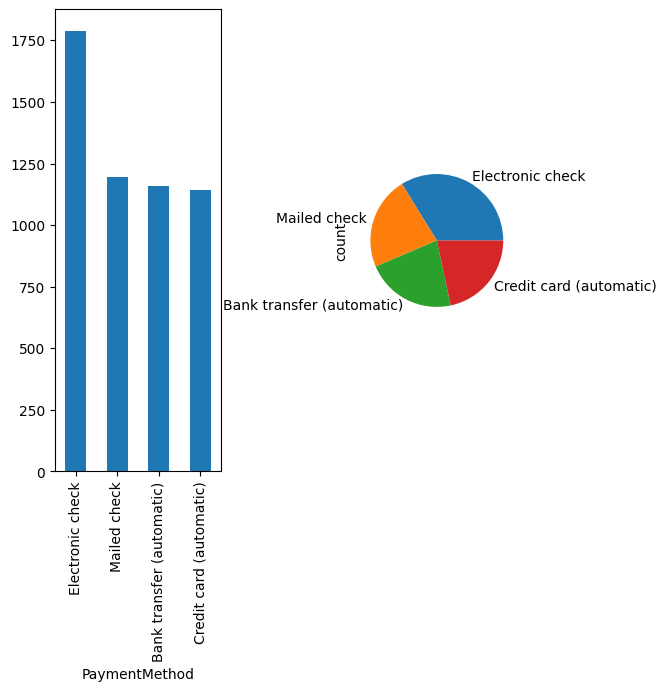

In [ ]:
for col in cat_columns[1:]:
  fig, axes = plt.subplots(figsize=(6, 6))
  fig.subplots_adjust(hspace = 0.5, wspace=0.8)
  plt.subplot(1, 2, 1)
  df[col].value_counts().plot(kind='bar')
  df[col].value_counts()
  plt.subplot(1, 2, 2)
  df[col].value_counts().plot(kind='pie')

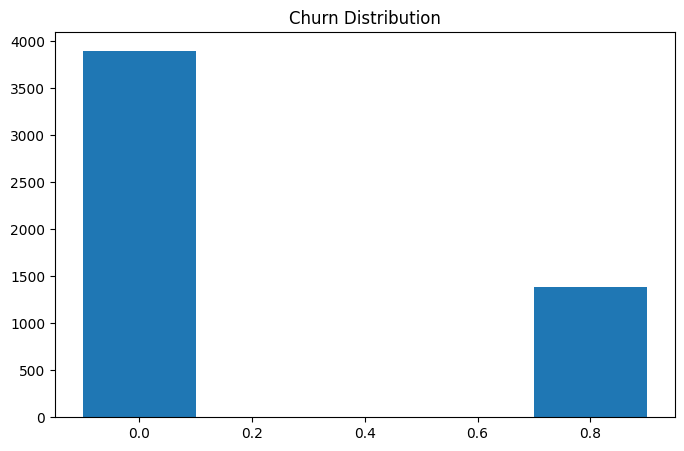

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Churn'], bins=5, align='left')
plt.title('Churn Distribution')
plt.show()

Churn distribution is balanced

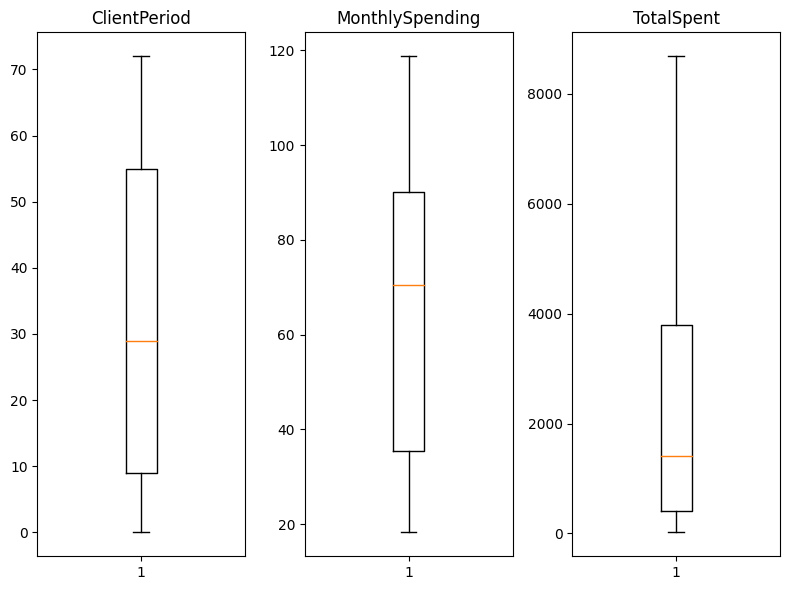

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))

for i, col in enumerate(num_columns):
    plt.sca(axes[i])
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [10]:
df.duplicated().sum()

14

In [11]:
df = df.drop_duplicates().reset_index(drop=True)

## **Applying Linear Models**

Encoding


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder, StandardScaler,  OrdinalEncoder

Create categorial transformer for columns which contains only "Yes" or "No" values. I do it because this leads to less count of columns.

In [12]:
cat_ord_columns = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']
cat_ohe_columns = list(set(cat_columns) - set(cat_ord_columns))

In [ ]:
num_transformer = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_ord_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder())
cat_ohe_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [ ]:
preprocessor = ColumnTransformer(
    [('num', num_transformer, num_columns),
     ('cat_tf', cat_ord_transformer, cat_ord_columns),
     ('cat_comp', cat_ohe_transformer, cat_ohe_columns)],
    verbose_feature_names_out=False
)

In [ ]:
alg = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', LogisticRegression())
])

Selection of a parameter C

In [ ]:
parameters = {
    'alg__C' : [100, 10, 1, 0.1, 0.01, 0.001]
}

gs = GridSearchCV(alg,
                  parameters,
                  cv=5,
                  verbose=2,
                  n_jobs=2,
                  scoring='roc_auc')

gs.fit(df.drop(columns=['Churn']), df['Churn'])
gs.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'alg__C': 10}

In [ ]:
gs.best_score_

0.8444899667168722

Best paramters: penalty: 'l2', solver='lbfgs', C=10

# **Applying CatBoost**

In [13]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


In [14]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], test_size=0.2)

In [16]:
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=cat_columns)

test_dataset = Pool(data=X_test,
                     label=y_test,
                     cat_features=cat_columns)

Testing CatBoost with default parameters



In [19]:
model = CatBoostClassifier(eval_metric='AUC', verbose=False)
model.fit(train_dataset)

KeyboardInterrupt: 

In [18]:
preds = model.predict_proba(test_dataset)[:, 1]

CatBoostError: There is no trained model to use predict_proba(). Use fit() to train model. Then use this method.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, preds)

CatBoost with GridSearch

In [ ]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    #eval_metric='AUC',
    verbose=False,
    max_ctr_complexity=1)

grid = {'learning_rate': [0.01, 0.1, 0.05],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid,
                                       train_dataset,
                                       verbose=False,
                                       plot=True)

In [ ]:
grid_search_result['params']

{'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 7}

In [ ]:
model = CatBoostClassifier(
    learning_rate=0.1,
    depth=4,
    l2_leaf_reg=7,
    boosting_type='Plain',
    bootstrap_type='MVS',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=4,
    eval_metric='AUC',
    verbose=False,)

grid = {'random_seed': np.arange(40, 51),
        'iterations': [100, 150, 200]}

grid_search_result = model.grid_search(grid,
                                       train_dataset,
                                       verbose=False,
                                       plot=True)



In [ ]:
grid_search_result['params']

{'random_seed': 46, 'iterations': 100}

In [ ]:
model = CatBoostClassifier(
    random_seed=46,
    iterations=100,
    learning_rate=0.1,
    depth=4,
    l2_leaf_reg=6,
    boosting_type='Plain',
    bootstrap_type='MVS',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=4,
    eval_metric='AUC',
    verbose=False)

model.fit(train_dataset)

In [ ]:
train_preds = model.predict_proba(X_train)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_train, train_preds), roc_auc_score(y_test, test_preds)

(0.8695843441505995, 0.8511004784688995)

Best parameters for CatBoost: random_seed=46,
    iterations=100,
    learning_rate=0.1,
    depth=4,
    l2_leaf_reg=6,
    boosting_type='Plain',
    bootstrap_type='MVS',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=4


# **Predictions**

In [20]:
best_model = CatBoostClassifier(
    random_seed=46,
    iterations=100,
    learning_rate=0.1,
    depth=4,
    l2_leaf_reg=6,
    boosting_type='Plain',
    bootstrap_type='MVS',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=4,
    eval_metric='AUC',
    verbose=False)

train_dataset = Pool(data=df.drop(columns=['Churn']),
                     label=df['Churn'],
                     cat_features=cat_columns)

best_model.fit(train_dataset)

In [33]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)